In [2]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
data = pd.read_csv('./Resources/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data.head(15)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


# 1. **Data Exploration**

In [4]:
# Identify categorical variables vs numberic
categorical_variables = data.select_dtypes(exclude=['int', 'float','number']).columns
numeric_variables = data.select_dtypes(include=['int', 'float','number']).columns

print(f'Categorical: {categorical_variables}')
print(f'Numeric: {numeric_variables}')

print(len(categorical_variables))
print(len(numeric_variables))

Categorical: Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')
Numeric: Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')
16
8


In [5]:
# There is a total of 16 categorical variables and 8 numeric variables
# Understand the data
for col in data.columns: 
    print(col)
len(list(data.columns.values))

Customer
State
Customer Lifetime Value
Response
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Income
Location Code
Marital Status
Monthly Premium Auto
Months Since Last Claim
Months Since Policy Inception
Number of Open Complaints
Number of Policies
Policy Type
Policy
Renew Offer Type
Sales Channel
Total Claim Amount
Vehicle Class
Vehicle Size


24

In [6]:
# Understand Categorical Values
state = data.State.unique()
print(f'States: {state}')
print(len(state))
print("-----------------------")

Response = data.Response.unique()
print(f'Response: {Response}')
print(len(Response))
print("-----------------------")

coverage = data.Coverage.unique()
print(f'Response: {coverage}')
print(len(coverage))
print("-----------------------")

education = data.Education.unique()
print(f'Response: {education}')
print(len(education))
print("-----------------------")

policy = data.Policy.unique()
print(f'Response: {policy}')
print(len(policy))
print("-----------------------")

States: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
5
-----------------------
Response: ['No' 'Yes']
2
-----------------------
Response: ['Basic' 'Extended' 'Premium']
3
-----------------------
Response: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
5
-----------------------
Response: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
9
-----------------------


In [7]:
# Customer LTV range
# 

print("Min:")
print(min(data["Customer Lifetime Value"]))
print("Max:")
print(max(data["Customer Lifetime Value"]))
print("-------------")
print("Average:")
print(data['Customer Lifetime Value'].mean())
print("Median:")
print(data['Customer Lifetime Value'].median())



Min:
1898.007675
Max:
83325.38119
-------------
Average:
8004.9404749870755
Median:
5780.182197


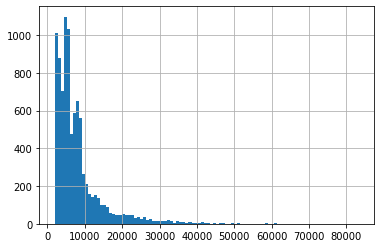

In [12]:
hist = data['Customer Lifetime Value'].hist(bins=100)

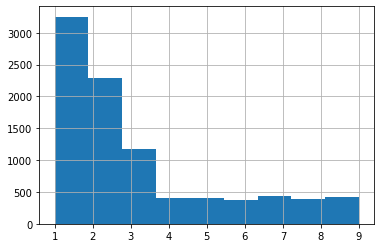

In [15]:
hist = data['Number of Policies'].hist(bins=9)

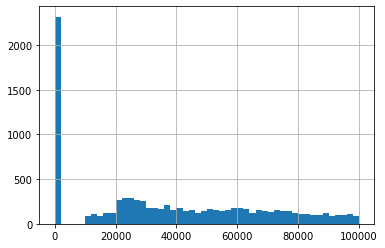

In [18]:
hist = data['Income'].hist(bins=50)

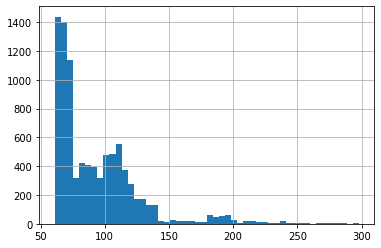

In [22]:
hist = data['Monthly Premium Auto'].hist(bins=50)

# 2. **Data Processing**

In [85]:
# Identify and eliminate any NA values in the data set
# Number of entries
print("---------------------")
print(len(data))
# Drop any NA values
data.dropna()
print("---------------------")
print(len(data))

---------------------
9134
---------------------
9134


In [89]:
# Drop unneccessary columns
new_data = data.drop(columns=['Effective To Date', 'Customer'])
new_data

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [91]:
# Dummy coding for categorical variables (get_dummies)
# Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers.
# We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these 
# standard preprocessing techniques. Pandas also provides a get_dummies method that is useful to generate binary 
# encoded data from a Data Frame.

data_binary_encoded = pd.get_dummies(new_data, columns=['State','Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'])
data_binary_encoded.head()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,1,0,0,0,0,0,0,1,0


In [92]:
# number of columns after dummy
for col in data_binary_encoded.columns: 
    print(col)
len(list(data_binary_encoded.columns.values))

Customer Lifetime Value
Income
Monthly Premium Auto
Months Since Last Claim
Months Since Policy Inception
Number of Open Complaints
Number of Policies
Total Claim Amount
State_Arizona
State_California
State_Nevada
State_Oregon
State_Washington
Response_No
Response_Yes
Coverage_Basic
Coverage_Extended
Coverage_Premium
Education_Bachelor
Education_College
Education_Doctor
Education_High School or Below
Education_Master
EmploymentStatus_Disabled
EmploymentStatus_Employed
EmploymentStatus_Medical Leave
EmploymentStatus_Retired
EmploymentStatus_Unemployed
Gender_F
Gender_M
Location Code_Rural
Location Code_Suburban
Location Code_Urban
Marital Status_Divorced
Marital Status_Married
Marital Status_Single
Policy Type_Corporate Auto
Policy Type_Personal Auto
Policy Type_Special Auto
Policy_Corporate L1
Policy_Corporate L2
Policy_Corporate L3
Policy_Personal L1
Policy_Personal L2
Policy_Personal L3
Policy_Special L1
Policy_Special L2
Policy_Special L3
Renew Offer Type_Offer1
Renew Offer Type_Off

65


# 3. **Linear Regression Model**

In [94]:
# Assign X (data) and y (target)
X = data_binary_encoded.drop("Customer Lifetime Value", axis=1)
y = data_binary_encoded["Customer Lifetime Value"].values.reshape(-1, 1)
print(X.shape, y.shape)

(9134, 64) (9134, 1)


In [142]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)


In [143]:
# Create the model
from sklearn.linear_model import LinearRegression
linear_regression_model_1 = LinearRegression()

In [144]:
# Fit the model to the training data and calculate the scores for the training and testing data

linear_regression_model_1.fit(X_train, y_train)
training_score = linear_regression_model_1 .score(X_train, y_train)
testing_score = linear_regression_model_1 .score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1731095805328099
Testing Score: 0.15258961159707163


Text(0.5, 1.0, 'Residual Plot')

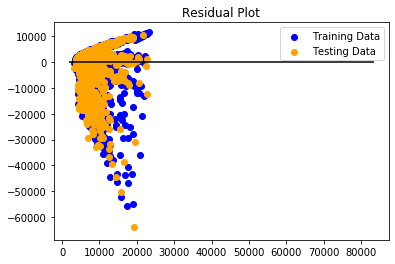

In [145]:
plt.scatter(linear_regression_model_1.predict(X_train), linear_regression_model_1.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linear_regression_model_1.predict(X_test), linear_regression_model_1.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [146]:
linear_regression_model_1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [147]:
print('intercept:', linear_regression_model_1.intercept_)
print('slope:', linear_regression_model_1.coef_)

intercept: [2811.14079283]
slope: [[-4.15237380e-03  6.22213247e+01 -5.89541692e-01 -1.04327014e+00
  -2.88478552e+02  6.06399731e+01 -5.79978083e-02  6.49558245e+01
  -1.84894981e+01 -3.59466348e+01 -9.57302961e+01  8.52106046e+01
   1.00556873e+02 -1.00556873e+02 -1.03187448e+02  1.07638019e+02
  -4.45057117e+00 -9.64644076e+01  6.82532163e+01 -4.46119548e+02
   2.90111098e+02  1.84219641e+02 -7.12721628e+01  5.63281049e+02
  -2.50859596e+02 -7.95440242e+01 -1.61605265e+02  6.90008778e+01
  -6.90008778e+01  1.69694497e+02 -2.58391536e+02  8.86970388e+01
   9.54108142e+01  1.18596988e+02 -2.14007802e+02 -2.70182934e+02
  -9.21131228e+01  3.62296057e+02  4.64628412e+02 -5.92343296e+02
  -1.42468050e+02 -1.42992439e+02  8.06455882e+01 -2.97662720e+01
  -3.58961921e+01  1.84849426e+02  2.13342824e+02  6.41949938e+02
  -3.28224875e+02  2.56222800e+02 -5.69947863e+02 -1.29018206e+02
   7.07609043e+00  1.49641303e+02 -2.76991870e+01 -1.21812483e+03
   8.51743594e+02  9.96000639e+02 -1.52081

In [148]:
# Now we will create a Linear Regression model with only numerical data to compare the models performance
only_numerical_df = data.drop(columns = ['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'])
only_numerical_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [149]:
X_num = only_numerical_df.drop("Customer Lifetime Value", axis=1)
y_num = only_numerical_df["Customer Lifetime Value"].values.reshape(-1, 1)
print(X_num.shape, y_num.shape)

(9134, 7) (9134, 1)


In [150]:
# Split data to train and test model
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, random_state=24)

# Create second model
linear_regression_model_2 = LinearRegression()

In [151]:
linear_regression_model_2.fit(X_num_train, y_num_train)
training_score_2 = linear_regression_model_2 .score(X_num_train, y_num_train)
testing_score_2 = linear_regression_model_2 .score(X_num_test, y_num_test)


print(f"Training Score: {training_score_2}")
print(f"Testing Score: {testing_score_2}")

Training Score: 0.15656862034520513
Testing Score: 0.17054350594545356


In [ ]:
# The score is no better than the first model, but it is simpler (less variables)